## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [1]:
## 
"""
Your code here (optional)
確認硬體資源
"""


In [2]:
import os
import keras

# 請嘗試設定 GPU：os.environ


In [3]:
train, test = keras.datasets.cifar10.load_data()

In [4]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten = True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes = 10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y
    

In [5]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [8]:
"""Code Here
建立你的神經網路
"""
def build_mlp(input_shape, output_units=10, num_neurons=[512, 512, 256,
                                                         256, 256, 256, 
                                                         128, 128, 128, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i ==0:
            x = keras.layers.Dense(units=n_units, activation="relu", name = "hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name = "hidden_layer"+str(i+1))(x)
    out = keras.layers.Dense(units = output_units, activation = "softmax", name = "output")(x)
                                                                                            
    model = keras.models.Model(inputs = [input_layer], outputs = [out])
    return model            

model = build_mlp(input_shape=x_train.shape[1:])                                                                                            
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 512)               262656    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer4 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer5 (Dense)        (None, 256)               65792     
_________________________________________________________________
hidden_layer6 (Dense)        (None, 256)               6579

In [9]:
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

In [10]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [11]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)


Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 7s 146us/step - loss: 2.0104 - accuracy: 0.2383 - val_loss: 1.8329 - val_accuracy: 0.3341
Epoch 2/100
50000/50000 [==============================] - 7s 140us/step - loss: 1.8012 - accuracy: 0.3415 - val_loss: 1.7711 - val_accuracy: 0.3543
Epoch 3/100
50000/50000 [==============================] - 7s 148us/step - loss: 1.7218 - accuracy: 0.3739 - val_loss: 1.6849 - val_accuracy: 0.3864
Epoch 4/100
50000/50000 [==============================] - 7s 147us/step - loss: 1.6557 - accuracy: 0.4027 - val_loss: 1.6209 - val_accuracy: 0.4126
Epoch 5/100
50000/50000 [==============================] - 7s 146us/step - loss: 1.5817 - accuracy: 0.4281 - val_loss: 1.5778 - val_accuracy: 0.4364
Epoch 6/100
50000/50000 [==============================] - 7s 141us/step - loss: 1.5395 - accuracy: 0.4465 - val_loss: 1.5393 - val_accuracy: 0.4466
Epoch 7/100
50000/50000 [==============================

Epoch 54/100
50000/50000 [==============================] - 7s 133us/step - loss: 0.4176 - accuracy: 0.8530 - val_loss: 2.4597 - val_accuracy: 0.4904
Epoch 55/100
50000/50000 [==============================] - 7s 138us/step - loss: 0.4016 - accuracy: 0.8601 - val_loss: 2.4931 - val_accuracy: 0.4952
Epoch 56/100
50000/50000 [==============================] - 7s 136us/step - loss: 0.3906 - accuracy: 0.8624 - val_loss: 2.5603 - val_accuracy: 0.4921
Epoch 57/100
50000/50000 [==============================] - 7s 149us/step - loss: 0.3743 - accuracy: 0.8690 - val_loss: 2.6632 - val_accuracy: 0.4908
Epoch 58/100
50000/50000 [==============================] - 7s 137us/step - loss: 0.3778 - accuracy: 0.8683 - val_loss: 2.6236 - val_accuracy: 0.4932
Epoch 59/100
50000/50000 [==============================] - 7s 132us/step - loss: 0.3555 - accuracy: 0.8763 - val_loss: 2.7191 - val_accuracy: 0.4952
Epoch 60/100
50000/50000 [==============================] - 7s 140us/step - loss: 0.3483 - accuracy:

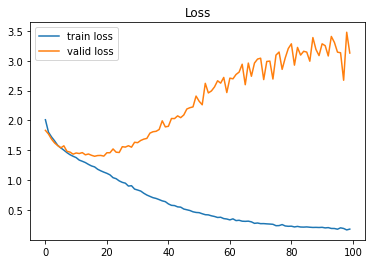

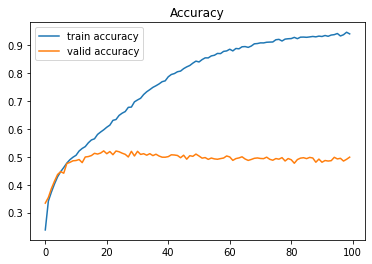

In [13]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["accuracy"]
valid_acc = model.history.history["val_accuracy"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()